# Pymaceuticals Inc.
---

### Analysis

- In this study we look at cancer treatment data for a total of 249 mice
    - This study shows that Capomulin treatment has an lower average tumor size and less variance than most treatment types excpet for Ramicane
    - Gender distrubution between mice was nearly equal
    - Looking at outliers and creating box plots it was observed that the Capomulin data has very small outliers compared to other studies
    - Both Capomulin and Ramicane had the most amount of trials which shows that the data is not skewed due to lack of trails
    - Our linear regression shows that the tumor volume and mouse weight are most likely corelated with a coefficient of .84
- Overall I think the Capomulin trial was fair and the results are just as good as Ramicane. 
    
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_df = pd.merge(study_results,mouse_metadata,how='left')

# Display the data table for preview
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_study_df['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dup=combined_study_df["Mouse ID","Timepoint"]
dup=combined_study_df.loc[combined_study_df.duplicated()]
dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
value=[]
for row in range(dup["Mouse ID"].count()):   
        value.append(dup.iloc[row]['Mouse ID'])
print(value)
combined_study_df.loc[combined_study_df['Mouse ID'] == value[0]]


['g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#dup_index=combined_study_df[(combined_study_df['Mouse ID'] == "g989")& (combined_study_df['Timepoint'] <= 25)].index
#print(dup_index)
clean_df=combined_study_df.loc[combined_study_df['Mouse ID']!=value[0]]
#clean_df=combined_study_df.drop(subset = ['Mouse ID'], keep = 'first')
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#regimine_group=clean_df[["Tumor Volume (mm3)","Drug Regimen"]]
regimine_group = pd.DataFrame()
regimine_group['Mean Tumor Volume']=clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen',as_index=True).mean()
regimine_group['Median Tumor Volume']=clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen',as_index=True).median()
regimine_group['Tumor Volume Variance']=clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen',as_index=True).var()
regimine_group['Tumor Volume Std. Dev']=clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen',as_index=True).std()
regimine_group['Tumor Volume Std. ERR']=clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen',as_index=True).sem()



#regimine_group.rename(index={0: "Mean", 1: "y", 2: "z"})
#regimine_group.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'}, inplace=True)
#regimine_group['Median Tumor Volume'] = regimine_group.median(numeric_only=True, axis=1)
regimine_group.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. ERR
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

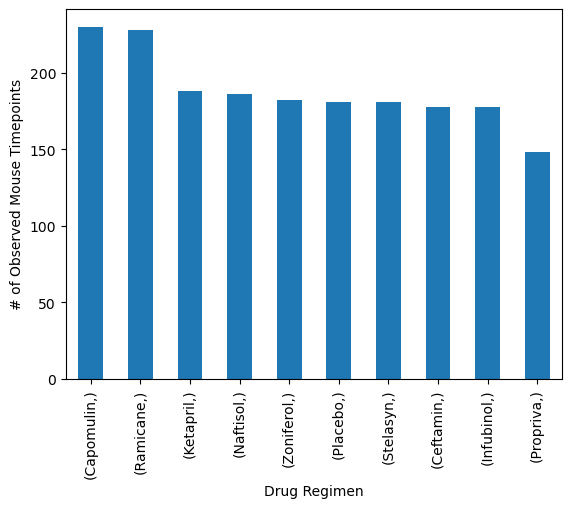

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Chart_group = pd.DataFrame()

Chart_group=clean_df[["Drug Regimen"]].value_counts()
#Chart_group['Mean Tumor Volume']=Chart_group['Mouse ID'].groupby('Drug Regimen',as_index=True).count()
Chart_group.plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")



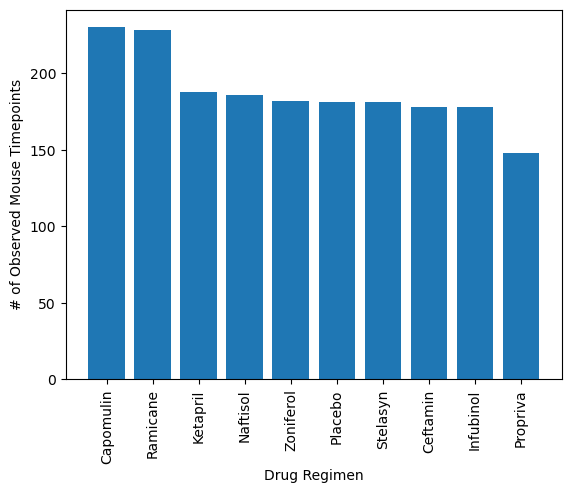

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Chart_group = pd.DataFrame()

Chart_group['counts']=clean_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen',as_index=True).count()
Chart_group.sort_values('counts',ascending=False,inplace=True)
#timepoints_chart=Chart_group.plot(kind="bar",legend=False)
plt.bar(Chart_group.index.values,Chart_group['counts'])
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


<Axes: ylabel='count'>

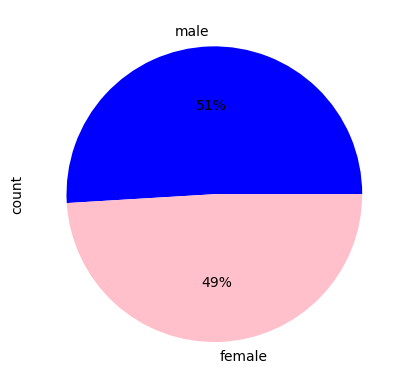

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts=clean_df[['Sex']].value_counts()
sex_counts.plot.pie(labels=['male','female'],colors=['blue','pink'],autopct='%1.0f%%')

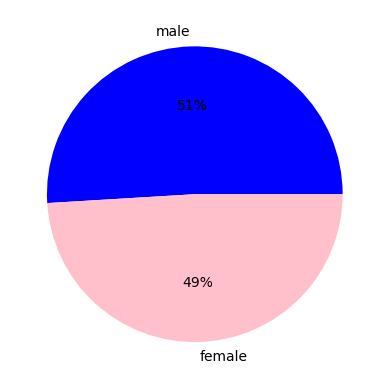

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=['male','female']
color=['blue','pink']
plt.pie(sex_counts,labels=label,colors=color,autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_point=clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
    
greatest_point

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge=pd.merge(clean_df,greatest_point,how="right",on=["Mouse ID","Timepoint"])
max_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_data=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data.append(max_merge.loc[max_merge['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
    # add subset 
    
    # Determine outliers using upper and lower bounds
    quartiles = max_merge.loc[max_merge['Drug Regimen']==treatment]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(treatment+'s potential outliers:'+ str(lower_bound)+ ' and: ' +str(upper_bound))



Capomulins potential outliers:20.70456164999999 and: 51.83201549
Ramicanes potential outliers:17.912664470000003 and: 54.30681135
Infubinols potential outliers:36.83290494999999 and: 82.74144559000001
Ceftamins potential outliers:25.355449580000002 and: 87.66645829999999


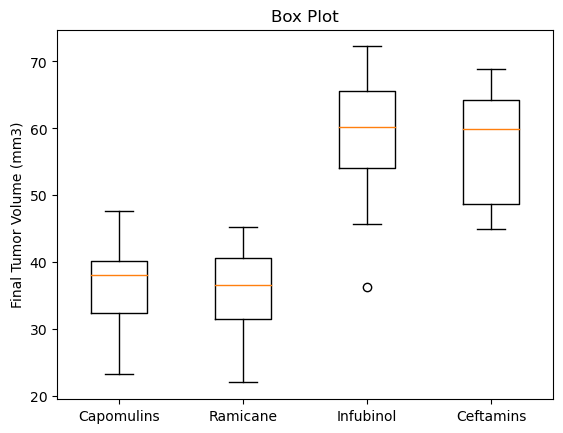

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
label=["Capomulins","Ramicane","Infubinol","Ceftamins"]
fig1, ax1 = plt.subplots()
ax1.set_title("Box Plot")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_data,labels=label)
plt.show()



## Line and Scatter Plots

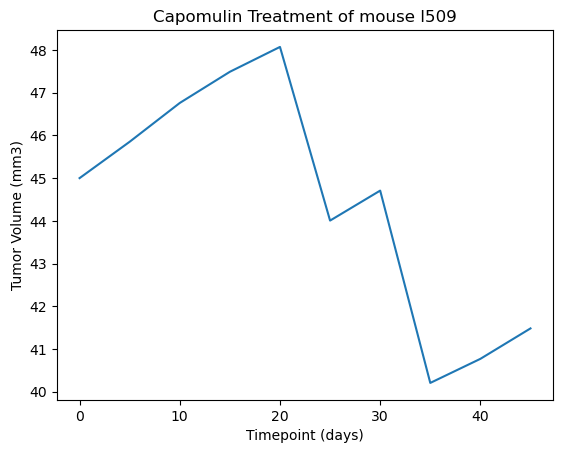

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
mouse_l509=clean_df.loc[clean_df["Mouse ID"]=="l509"]
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.show()

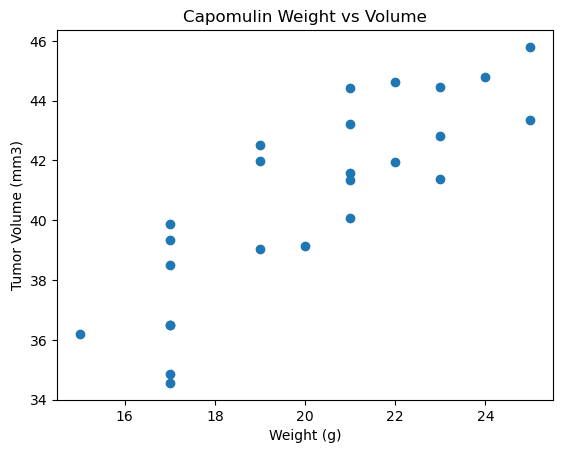

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Weight vs Volume")
capomulin_data=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
avg_vol_cap=capomulin_data.groupby(capomulin_data["Mouse ID"]).mean(numeric_only=True)
plt.scatter(avg_vol_cap["Weight (g)"], avg_vol_cap["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


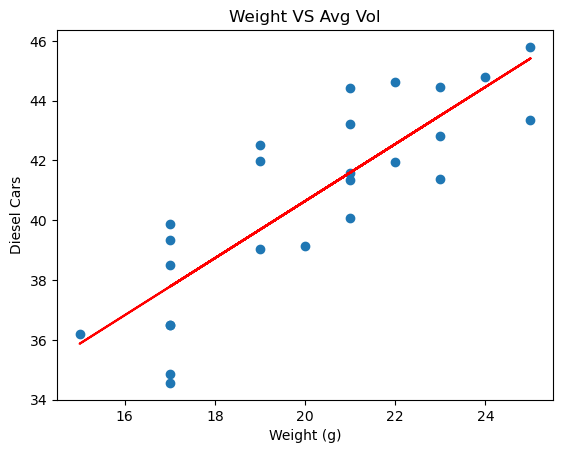

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
coeff= st.pearsonr( avg_vol_cap["Weight (g)"],avg_vol_cap["Tumor Volume (mm3)"])
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(
    avg_vol_cap["Weight (g)"], avg_vol_cap["Tumor Volume (mm3)"])
d_fit = d_slope * avg_vol_cap["Weight (g)"] + d_int
plt.scatter(avg_vol_cap["Weight (g)"],avg_vol_cap["Tumor Volume (mm3)"])
plt.plot(avg_vol_cap["Weight (g)"],d_fit,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Diesel Cars')
plt.title('Weight VS Avg Vol')
print("The correlation between mouse weight and average tumor volume is: " +str( round(coeff[0],2)))
plt.show()